In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as pl

image_path = "./images/"
%matplotlib inline


(412, 269, 3)

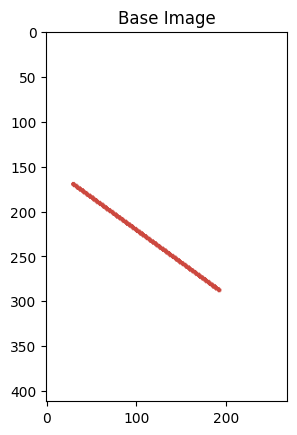

In [30]:
img2 = cv2.imread("./images/img_02.jpg", )
pl.figure()
pl.title("Base Image")
pl.imshow(img2, cmap='bone')
img2.shape


(412, 269)

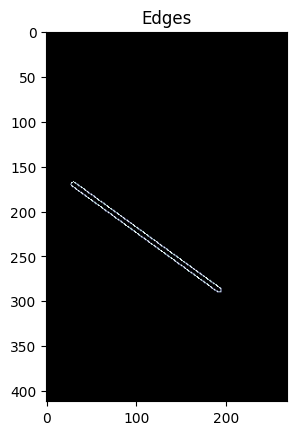

In [42]:
edge = cv2.Canny(img2, 200, 200)
pl.figure()
pl.title("Edges")
pl.imshow(edge, cmap='bone')
edge.shape


In [41]:
points_cord = []

for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        if edge[i, j] > 200:
            # print(f"i:{i}, j:{j},img2: {edge[i,j]}")
            points_cord.append(np.array([i, j]))

len(points_cord)


488

In [33]:
points = np.array(points_cord)
mean = np.mean(points, axis=0)
mul = points[:, 0] * points[:, 1] # x * y


mean_x = mean[0] # mean of x
mean_y = mean[1] # mean of y
x2_mean = np.mean(points[:, 0] * points[:, 0]) # mean of x * y

mul_mean = np.mean(mul) # mean of x * y

m = ((mean_x * mean_y - mul_mean)/(mean_x * mean_x - x2_mean)) 

c = (mean_y - m * mean_x)

print("m:", m, "c:", c,"mean_x:",mean_x, "mean_y:",mean_y)


m: 1.36671701773495 c: -201.98564231331636 mean_x: 228.99795081967213 mean_y: 110.98975409836065


(412, 269, 3)

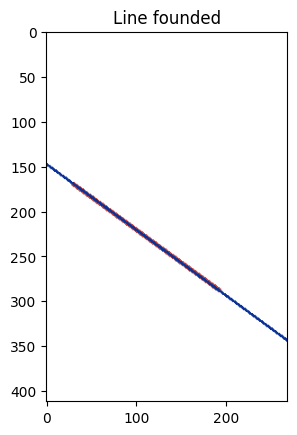

In [43]:
img = cv2.imread('images/img_02.jpg')
line = cv2.line(img, ( int(m+c),1), ( int(m*350+c),350), (10, 50, 150),2)

pl.figure()
pl.title("Line founded")
pl.imshow(line, cmap='bone')
line.shape
